# 한글폰트

In [ ]:
# 폰트 설치
!apt-get update -qq # 나눔고딕 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
# 여기까지 실행 후 "런타임 다시 시작..." 실행 (이 부분은 실행할 필요 없음)

Selecting previously unselected package fonts-nanum.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


# Install

In [ ]:
# Tokenizer library 설치
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 5.3MB/s 


# Evn

In [ ]:
# imports
import argparse
import os
import random
import shutil
import json
import zipfile
import math
import copy
import collections
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sentencepiece as spm
import tensorflow as tf
import tensorflow.keras.backend as K

from tqdm.notebook import tqdm, trange

In [ ]:
# 환경 설정
args = {
    # random seed value
    "seed": 1234
}
args = argparse.Namespace(**args)

print(args)

Namespace(seed=1234)


In [ ]:
# random seed 설정
random.seed(args.seed)
np.random.seed(args.seed)
tf.random.set_seed(args.seed)

In [ ]:
# gpu 사용량 확인
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data dir
# data_dir = '/content/drive/MyDrive/Data/nlp'
data_dir = '/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data'
os.listdir(data_dir)

['data-20210420T111231Z-001.zip', 'kowiki']

# Word2Vec

## Tutorial

In [ ]:
# 입력 문장
sentences = [
    "나는 학생 입니다",
    "당신은 수학 선생님 입니다",
    "나는 선생님 입니다",
    "당신은 수학 학생 입니다"
]

In [ ]:
words = []
for line in sentences:
    for w in line.split():
        words.append(w)

words = list(dict.fromkeys(words))
words

['나는', '학생', '입니다', '당신은', '수학', '선생님']

In [ ]:
word_to_id = {}
for w in words:
    if w not in word_to_id:
        word_to_id[w] = len(word_to_id)
word_to_id

{'나는': 0, '당신은': 3, '선생님': 5, '수학': 4, '입니다': 2, '학생': 1}

In [ ]:
inputs = np.array([word_to_id["수학"]])
labels = np.array([word_to_id["선생님"]])
inputs, labels

(array([4]), array([5]))

In [ ]:
n_vocab = len(word_to_id)

In [ ]:
V = tf.keras.layers.Embedding(n_vocab, 4)
v_c = V(inputs)
v_c

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 0.04810704, -0.03535189,  0.04945729,  0.02813626]],
      dtype=float32)>

In [ ]:
V.get_weights()[0].shape

(6, 4)

In [ ]:
# y = Wx + b
linear = tf.keras.layers.Dense(6, use_bias=False)
linear(v_c)

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[ 0.0406021 , -0.02904922,  0.02427538,  0.05958116, -0.0273885 ,
         0.01687752]], dtype=float32)>

In [ ]:
W = linear.get_weights()[0]
W.shape, W

((4, 6),
 array([[ 0.27351642, -0.281238  ,  0.3167249 ,  0.2820921 , -0.3764476 ,
          0.13742352],
        [-0.26049197, -0.00776649, -0.30624196,  0.08159471, -0.02906376,
         -0.7696569 ],
        [ 0.52402306,  0.03229821,  0.3835708 ,  0.68946147, -0.51482993,
          0.0430457 ],
        [-0.2730145 , -0.61812174, -0.7377639 ,  0.5258759 ,  0.53866136,
         -0.6778183 ]], dtype=float32))

In [ ]:
tf.matmul(v_c, W)

<tf.Tensor: shape=(1, 1, 5), dtype=float32, numpy=
array([[[-0.02015915,  0.05562627,  0.02653324, -0.033848  ,
         -0.03018064]]], dtype=float32)>

In [ ]:
U = tf.keras.layers.Dense(n_vocab, use_bias=False)
vU = U(v_c)
vU

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[-0.03733963, -0.0234975 ,  0.04844721,  0.01608931,  0.00769082,
         0.01284879]], dtype=float32)>

In [ ]:
U.get_weights()[0].shape

(4, 6)

In [ ]:
vU_exp = tf.exp(vU)
vU_exp

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.9633489, 0.9767764, 1.0496399, 1.0162195, 1.0077205, 1.0129317]],
      dtype=float32)>

In [ ]:
vU_sum = tf.reduce_sum(vU_exp, axis=-1)
vU_sum

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([6.026637], dtype=float32)>

In [ ]:
y_prob = vU_exp / vU_sum
y_prob

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.15984851, 0.16207653, 0.17416677, 0.16862132, 0.16721107,
        0.16807577]], dtype=float32)>

In [ ]:
tf.nn.softmax(vU)

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.15984851, 0.16207653, 0.17416678, 0.16862132, 0.16721109,
        0.16807579]], dtype=float32)>

In [ ]:
labels

array([5])

In [ ]:
y_true = tf.one_hot(labels, n_vocab)
y_true

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [ ]:
loss = - y_true * tf.math.log(y_prob)
loss

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.       , 0.       , 0.       , 0.       , 0.       , 1.7833403]],
      dtype=float32)>

In [ ]:
loss = tf.reduce_sum(loss, axis=-1)
loss

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.7833403], dtype=float32)>

In [ ]:
tf.keras.losses.SparseCategoricalCrossentropy()(labels, y_prob)

<tf.Tensor: shape=(), dtype=float32, numpy=1.7833403>

In [ ]:
def build_model(n_vocab, d_model):
    inputs = tf.keras.layers.Input(shape=(None,))

    V = tf.keras.layers.Embedding(n_vocab, d_model)
    v_c = V(inputs)

    U = tf.keras.layers.Dense(n_vocab, use_bias=False, activation=tf.nn.softmax)
    y_pred = U(v_c)

    model = tf.keras.Model(inputs=inputs, outputs=y_pred)
    return model

In [ ]:
model = build_model(n_vocab, 16)
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

In [ ]:
model.predict(inputs)

array([[[0.16455585, 0.16579373, 0.17213449, 0.15777405, 0.16927458,
         0.17046727]]], dtype=float32)

## Data

In [ ]:
# 학습할 말뭉치
text = """수학은 수식이 복잡해서 어렵다
수학은 공식이 많아서 어렵다
수학은 수식이 이해되면 쉽다
수학은 공식이 능통하면 쉽다
영어는 단어가 많아서 어렵다
영어는 듣기가 복잡해서 어렵다
영어는 단어가 이해되면 쉽다
영어는 듣기가 능통하면 쉽다
국어는 지문이 복잡해서 어렵다
국어는 한문이 많아서 어렵다
국어는 지문이 이해되면 쉽다
국어는 한문이 능통하면 쉽다"""

## vocabulary

In [ ]:
words = []
for w in text.split():
    words.append(w)

words = list(dict.fromkeys(words))
# words = dict.fromkeys(words)
words

In [ ]:
word_to_id = {"[PAD]": 0, "[UNK]": 1}
for w in words:
    if w not in word_to_id:
        word_to_id[w] = len(word_to_id)
word_to_id

In [ ]:
id_to_word = {_id:w for w, _id in word_to_id.items()}
id_to_word

## Train 데이터 생성

In [ ]:
src = text.split("\n")
src

['수학은 수식이 복잡해서 어렵다',
 '수학은 공식이 많아서 어렵다',
 '수학은 수식이 이해되면 쉽다',
 '수학은 공식이 능통하면 쉽다',
 '영어는 단어가 많아서 어렵다',
 '영어는 듣기가 복잡해서 어렵다',
 '영어는 단어가 이해되면 쉽다',
 '영어는 듣기가 능통하면 쉽다',
 '국어는 지문이 복잡해서 어렵다',
 '국어는 한문이 많아서 어렵다',
 '국어는 지문이 이해되면 쉽다',
 '국어는 한문이 능통하면 쉽다']

In [ ]:
def make_data(src, n_win):
    inputs, labels = [], []

    for s in src:
        tokens = s.split()
        for i, c in enumerate(tokens):
            left = max(i - n_win, 0)
            right = min(i + n_win, len(tokens) - 1)
            os = [tokens[j] for j in range(left, right + 1) if i != j]
            for o in os:
                inputs.append(word_to_id[c])
                labels.append(word_to_id[o])

    inputs = np.array(inputs)
    labels = np.array(labels)
    return inputs, labels

In [ ]:
train_inputs, train_labels = make_data(src, 2)
print(train_inputs)
print(train_labels)

[ 2  2  3  3  3  4  4  4  5  5  2  2  6  6  6  7  7  7  5  5  2  2  3  3
  3  8  8  8  9  9  2  2  6  6  6 10 10 10  9  9 11 11 12 12 12  7  7  7
  5  5 11 11 13 13 13  4  4  4  5  5 11 11 12 12 12  8  8  8  9  9 11 11
 13 13 13 10 10 10  9  9 14 14 15 15 15  4  4  4  5  5 14 14 16 16 16  7
  7  7  5  5 14 14 15 15 15  8  8  8  9  9 14 14 16 16 16 10 10 10  9  9]
[ 3  4  2  4  5  2  3  5  3  4  6  7  2  7  5  2  6  5  6  7  3  8  2  8
  9  2  3  9  3  8  6 10  2 10  9  2  6  9  6 10 12  7 11  7  5 11 12  5
 12  7 13  4 11  4  5 11 13  5 13  4 12  8 11  8  9 11 12  9 12  8 13 10
 11 10  9 11 13  9 13 10 15  4 14  4  5 14 15  5 15  4 16  7 14  7  5 14
 16  5 16  7 15  8 14  8  9 14 15  9 15  8 16 10 14 10  9 14 16  9 16 10]


## Modeling

In [ ]:
args.n_vocab = len(word_to_id)
args.d_model = 32
args

Namespace(d_model=32, n_vocab=17, seed=1234)

In [ ]:
def build_model(args):
    inputs = tf.keras.layers.Input(shape=(None,))

    V = tf.keras.layers.Embedding(args.n_vocab, args.d_model)
    v_c = V(inputs)

    U = tf.keras.layers.Dense(args.n_vocab, use_bias=False, activation=tf.nn.softmax)
    y_pred = U(v_c)

    model = tf.keras.Model(inputs=inputs, outputs=y_pred)
    return model, V

In [ ]:
model, V = build_model(args)
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.predict(train_inputs)

## 벡터 출력

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
embed = tf.keras.layers.Embedding(args.n_vocab, args.d_model)

In [ ]:
def plot_embedding(V, word_to_id):
    plt.figure(figsize=(8, 8))
    plt.rc('font', family="NanumBarunGothic")
    plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결

    vectors = []
    words = []
    for word, _id in word_to_id.items():
        vectors.append(V(_id))
        words.append(word)
    vectors = PCA().fit_transform(vectors)[:, :2]
    
    for word, vector in zip(words, vectors):
        plt.scatter(vector[0], vector[1])
        plt.text(vector[0], vector[1], word)
    
    plt.show()

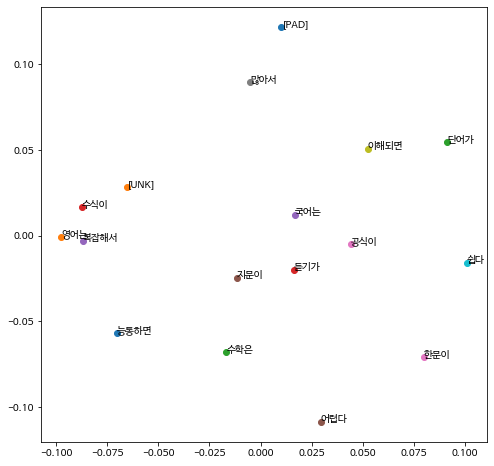

In [ ]:
plot_embedding(embed, word_to_id)

## Train

In [ ]:
model, V = build_model(args)
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
plot_embedding(V, word_to_id)

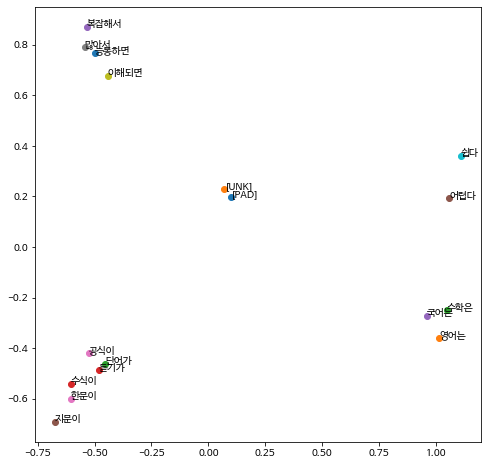

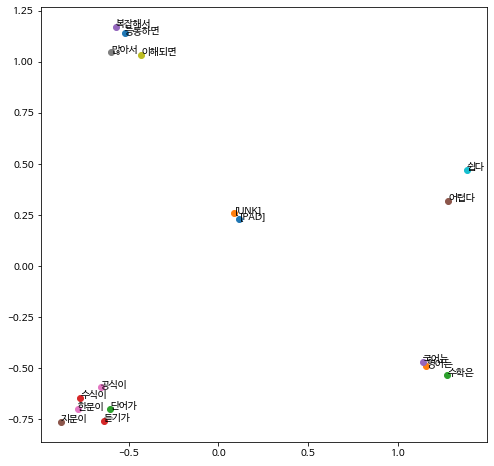

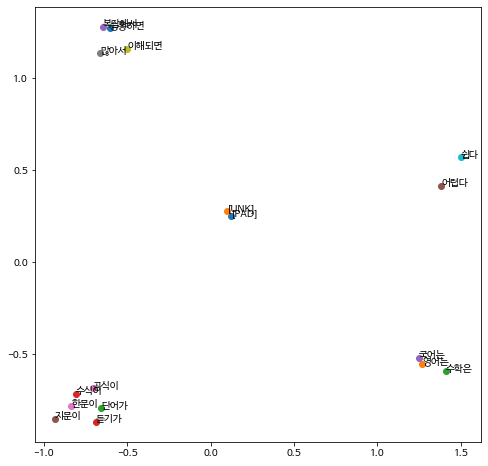

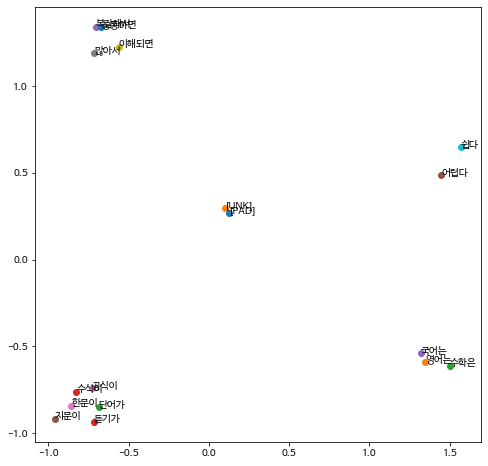

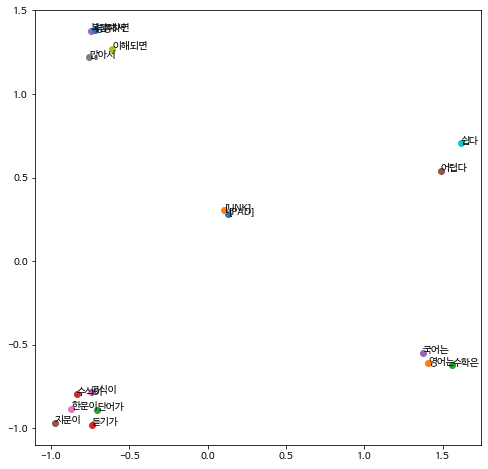

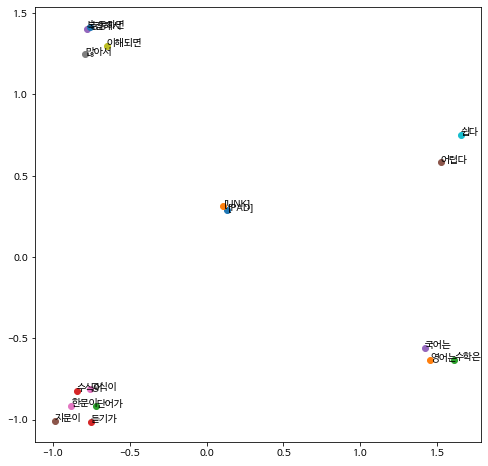

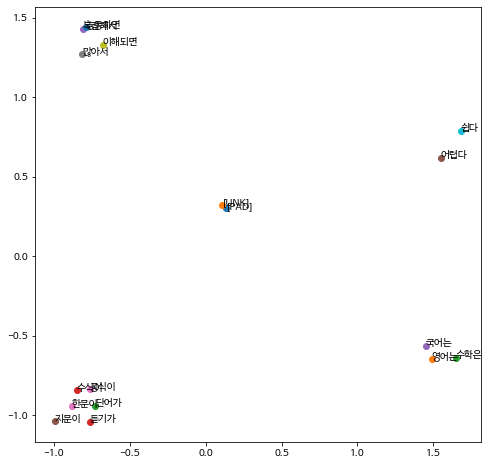

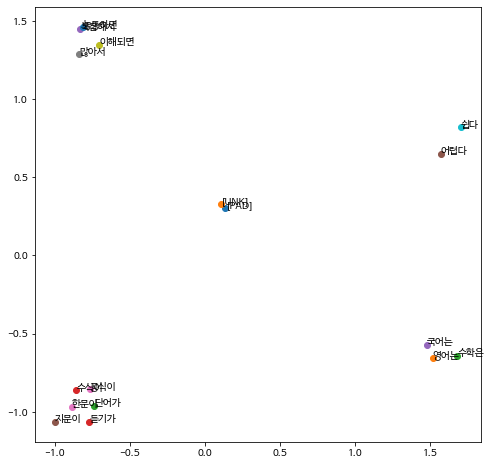

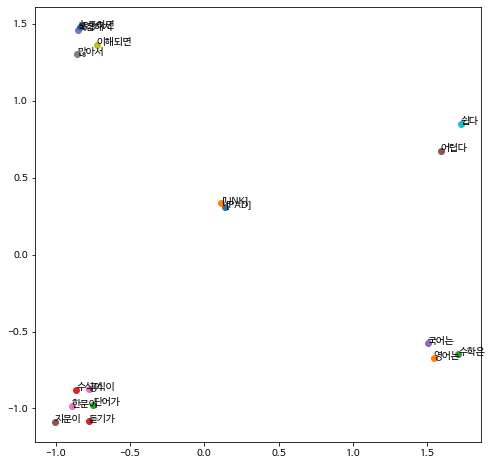

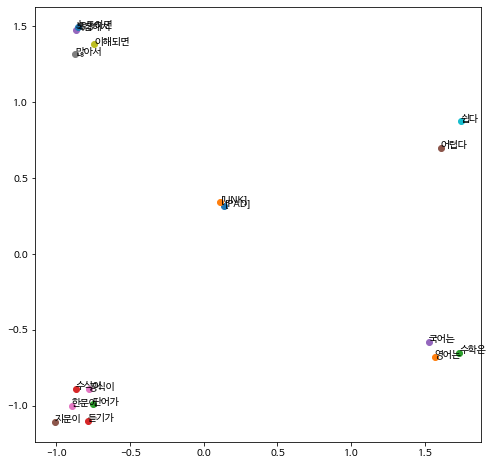

In [ ]:
for i in range(10):
    history = model.fit(train_inputs, train_labels,
                        epochs=100,
                        batch_size=8,
                        verbose=0)
    plot_embedding(V, word_to_id)

# Gensim

In [ ]:
import gensim
import gensim.downloader as api

In [ ]:
# wv = api.load('word2vec-google-news-300') # 1.6G
wv = api.load('glove-wiki-gigaword-100') # 128M

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
len(wv.vocab)

400000

In [ ]:
for i, word in enumerate(wv.vocab):
    if i >= 20:
        break
    print(word)

In [ ]:
wv.most_similar("obama")

In [ ]:
wv.most_similar("banana")

In [ ]:
wv.most_similar("apple")

In [ ]:
wv.most_similar(positive=["woman", "king"], negative=["man"])

In [ ]:
def analogy(p1, n1, p2):
    result = wv.most_similar(positive=[p2, p1], negative=[n1])
    return result

In [ ]:
analogy("king", "man", "woman")

In [ ]:
analogy("japanese", "japan", "korea")

In [ ]:
analogy("beer", "australia", "france")

In [ ]:
analogy("clinton", "reagan", "obama")

In [ ]:
analogy("fantastic", "good", "bad")

# Gensim 한국어 학습

- https://wikidocs.net/50739

In [ ]:
# 행태소분석기 설치
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4MB 60.7MB/s 
     |████████████████████████████████| 460kB 44.0MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5

In [ ]:
import konlpy
okt = konlpy.tag.Okt()

In [ ]:
okt.morphs("아버지가방에들어가신다")

['아버지', '가방', '에', '들어가신다']

In [ ]:
# 네이버 영화 리뷰 데이터 다운로드
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

--2021-05-03 10:11:21--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19515078 (19M) [text/plain]
Saving to: ‘ratings.txt’

ratings.txt         100%[===================>]  18.61M  52.4MB/s    in 0.4s    

2021-05-03 10:11:22 (52.4 MB/s) - ‘ratings.txt’ saved [19515078/19515078]



In [ ]:
nsmc_data = pd.read_csv("ratings.txt", header=0, delimiter='\t', quoting=3)
print(f"전체 데이터의 개수: {len(nsmc_data)}")
nsmc_data.head(10)

전체 데이터의 개수: 200000


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
# null 제거
nsmc_data = nsmc_data.dropna()
print(f"null 제거 후 데이터의 개수: {len(nsmc_data)}")
nsmc_data.head(10)

null 제거 후 데이터의 개수: 199992


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
# 한글 이외의 문자 제거
nsmc_data['document'] = nsmc_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
nsmc_data.dropna()
print(f"한글 아닌 문자 제거 후 데이터의 개수: {len(nsmc_data)}")
nsmc_data.head(10)

한글 아닌 문자 제거 후 데이터의 개수: 199992


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
counter = collections.defaultdict(int)
for i, document in enumerate(tqdm(nsmc_data['document'], total=len(nsmc_data))):
    line = okt.morphs(document)
    for w in line:
        counter[w] += 1
len(counter)

117294

In [ ]:
# 빈도수가 많은 50개 출력
most_freq = sorted(counter.items(), key=lambda item: item[1], reverse=True)
most_freq[:50]

[('이', 74723),
 ('영화', 67908),
 ('의', 41410),
 ('가', 36645),
 ('에', 36400),
 ('을', 30959),
 ('도', 28150),
 ('들', 25579),
 ('는', 23517),
 ('를', 21662),
 ('은', 21443),
 ('너무', 14891),
 ('한', 14770),
 ('다', 13589),
 ('정말', 12995),
 ('만', 11690),
 ('적', 11680),
 ('진짜', 11270),
 ('으로', 10541),
 ('로', 10488),
 ('점', 10184),
 ('에서', 9313),
 ('과', 8542),
 ('평점', 8537),
 ('연기', 8489),
 ('것', 8430),
 ('최고', 8049),
 ('내', 7939),
 ('그', 7606),
 ('나', 7512),
 ('잘', 7467),
 ('인', 7368),
 ('안', 7354),
 ('와', 7303),
 ('이런', 7172),
 ('생각', 7140),
 ('못', 7041),
 ('스토리', 7031),
 ('왜', 6833),
 ('드라마', 6710),
 ('게', 6708),
 ('이다', 6597),
 ('감동', 6516),
 ('사람', 6478),
 ('보고', 6277),
 ('하는', 6266),
 ('하고', 6154),
 ('말', 6000),
 ('고', 5999),
 ('더', 5865)]

In [ ]:
temp = [item[0] for item in most_freq[:50]]
print(temp)

['이', '영화', '의', '가', '에', '을', '도', '들', '는', '를', '은', '너무', '한', '다', '정말', '만', '적', '진짜', '으로', '로', '점', '에서', '과', '평점', '연기', '것', '최고', '내', '그', '나', '잘', '인', '안', '와', '이런', '생각', '못', '스토리', '왜', '드라마', '게', '이다', '감동', '사람', '보고', '하는', '하고', '말', '고', '더']


In [ ]:
# https://www.ranks.nl/stopwords/korean
# 불용어 정의 (빈도가 너무 많은 단어는 학습에서 제외 함)
stopwords = ['이', '의', '가', '에', '을', '도', '들', '는', '를', '은', '한', '다', '만', '적', '으로', '로', '에서', '과', '것', '내', '그', '나', '잘', '인', '안', '와', '이런', '왜', '게', '이다', '보고', '하는', '하고', '말', '고', '더']

In [ ]:
# okt 형태소 분석기를 이용해 형태소 단위로 분할
tokens = []
for i, document in enumerate(tqdm(nsmc_data['document'], total=len(nsmc_data))):
    line = okt.morphs(document)
    line = [word for word in line if not word in stopwords]
    tokens.append(line)

In [ ]:
# 음 잘 쪼개졌구만

print(len(tokens))
tokens[:10]

199992


[['어릴', '때', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ'],
 ['디자인',
  '배우는',
  '학생',
  '외국',
  '디자이너',
  '일군',
  '전통',
  '통해',
  '발전',
  '해가는',
  '문화',
  '산업',
  '부러웠는데',
  '사실',
  '우리나라',
  '에서도',
  '어려운',
  '시절',
  '끝',
  '까지',
  '열정',
  '지킨',
  '노라노',
  '같은',
  '전통',
  '있어',
  '저',
  '같은',
  '사람',
  '꿈',
  '꾸고',
  '이뤄',
  '나갈',
  '수',
  '있다는',
  '감사합니다'],
 ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버릴께', '하나', '없음', '최고'],
 ['연기',
  '진짜',
  '개',
  '쩔구나',
  '지루할거라고',
  '생각',
  '했는데',
  '몰입',
  '해서',
  '봤다',
  '그래',
  '이런게',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱한', '밤하늘', '떠', '있는', '초승달', '같은', '영화'],
 ['사랑', '해본', '사람', '라면', '처음', '부터', '끝', '까지', '웃을수', '있는', '영화'],
 ['완전', '감동', '입니다', '다시', '봐도', '감동'],
 ['개', '전쟁', '나오나요', '나오면', '빠', '싶음'],
 ['굿'],
 ['바보', '아니라', '병', '쉰', '인듯']]

In [ ]:
import gensim

# gensim 학습
word2vec_100 = gensim.models.Word2Vec(sentences=tokens, size=100, window=5, min_count=5)

# 실제로 모델 돌릴때는 크게 돌리고
# min_count = 5번 보다 적어지면 버리겠다


In [ ]:
words = list(word2vec_100.wv.vocab)
len(words), words[:100]

(26156,
 ['어릴',
  '때',
  '지금',
  '다시',
  '봐도',
  '재밌어요',
  'ㅋㅋ',
  '디자인',
  '배우는',
  '학생',
  '외국',
  '디자이너',
  '전통',
  '통해',
  '발전',
  '해가는',
  '문화',
  '산업',
  '사실',
  '우리나라',
  '에서도',
  '어려운',
  '시절',
  '끝',
  '까지',
  '열정',
  '지킨',
  '같은',
  '있어',
  '저',
  '사람',
  '꿈',
  '꾸고',
  '이뤄',
  '나갈',
  '수',
  '있다는',
  '감사합니다',
  '폴리스스토리',
  '시리즈',
  '부터',
  '뉴',
  '하나',
  '없음',
  '최고',
  '연기',
  '진짜',
  '개',
  '생각',
  '했는데',
  '몰입',
  '해서',
  '봤다',
  '그래',
  '이런게',
  '영화',
  '지',
  '안개',
  '밤하늘',
  '떠',
  '있는',
  '사랑',
  '해본',
  '라면',
  '처음',
  '웃을수',
  '완전',
  '감동',
  '입니다',
  '전쟁',
  '나오나요',
  '나오면',
  '빠',
  '싶음',
  '굿',
  '바보',
  '아니라',
  '병',
  '쉰',
  '인듯',
  '나이',
  '본',
  '하지만',
  '훗날',
  '사하나',
  '하',
  '감정',
  '완벽하게',
  '이해',
  '같다',
  '재밌다',
  '고질',
  '라니',
  '무',
  '귀엽다',
  '능',
  '오페라',
  '화',
  '라고',
  '해야'])

In [ ]:
similar = word2vec_100.wv.most_similar("영화")
similar

[('애니', 0.6344039440155029),
 ('애니메이션', 0.6079816818237305),
 ('수작', 0.6047705411911011),
 ('공포영화', 0.599032461643219),
 ('영화로', 0.5937458276748657),
 ('독립영화', 0.5931777954101562),
 ('다큐', 0.5861731767654419),
 ('이영화', 0.572426438331604),
 ('액션영화', 0.5702925324440002),
 ('다큐멘터리', 0.5632429122924805)]

In [ ]:
similar = word2vec_100.wv.most_similar("최민수")
similar

[('박신양', 0.9669265151023865),
 ('한석규', 0.9390171766281128),
 ('주니어', 0.9355772137641907),
 ('이정재', 0.9326146245002747),
 ('다우니', 0.9300159811973572),
 ('조한선', 0.929227888584137),
 ('김희선', 0.927953839302063),
 ('안성기', 0.9252122640609741),
 ('엄태웅', 0.9247462153434753),
 ('숀펜', 0.9241486191749573)]

In [ ]:
similar = word2vec_100.wv.most_similar("성인")
similar

[('겨울', 0.7368643283843994),
 ('자주', 0.7266741394996643),
 ('어땠을지', 0.7240051031112671),
 ('어른', 0.7126299738883972),
 ('강변', 0.708996593952179),
 ('순수했던', 0.7086382508277893),
 ('이전', 0.706307590007782),
 ('가을', 0.7045778036117554),
 ('화제', 0.7043766975402832),
 ('재미있을듯', 0.703895628452301)]

In [ ]:
# 설경구 - 송윤아 + 고소영
result = word2vec_100.wv.most_similar(positive=['고소영', '설경구'], negative=['송윤아'])
result

[('디카프리오', 0.8882691860198975),
 ('차승원', 0.8677750825881958),
 ('혼신', 0.8605861663818359),
 ('드니', 0.858435869216919),
 ('송강호', 0.8568586111068726),
 ('김혜수', 0.8548436164855957),
 ('엄정화', 0.8484259247779846),
 ('한석규', 0.8442444801330566),
 ('김상경', 0.8420130014419556),
 ('박중훈', 0.8361499309539795)]